hello, this is an answer for Notebook 1

steps, 
1. read the data
2. visualize the data
3. clean the data
4. merge the data
5.answer the questions


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### read (Patients data)

In [2]:
df_cp = pd.read_csv('data/data_clinical_patient.txt', delimiter='	' )
print("Data shape: "+str(df_cp.shape))
df_cp.head(5)

Data shape: (415, 37)


,#Patient Identifier,Subtype,TCGA PanCanAtlas Cancer Type Acronym,Other Patient ID,Diagnosis Age,Sex,Neoplasm Disease Stage American Joint Committee on Cancer Code,American Joint Committee on Cancer Publication Version Type,Last Communication Contact from Initial Pathologic Diagnosis Date,Birth from Initial Pathologic Diagnosis Date,...,Patient Weight,In PanCan Pathway Analysis,Overall Survival Status,Overall Survival (Months),Disease-specific Survival status,Months of disease-specific survival,Disease Free Status,Disease Free (Months),Progression Free Status,Progress Free Survival (Months)
0,#Identifier to uniquely specify a patient.,Subtype,Text field to hold cancer type acronym used by...,Legacy DMP patient identifier (DMPnnnn),Age at which a condition or disease was first ...,Sex,"The extent of a cancer, especially whether the...",The version or edition of the American Joint C...,Time interval from the date of last followup t...,Time interval from a person's date of birth to...,...,Weight measured in kilograms.,Patient Part of PanCan Pathway Analysis,Overall patient survival status.,Overall survival in months since initial diago...,The time period usually begins at the time of ...,The time period (months) usually begins at the...,Disease free status since initial treatment.,Disease free (months) since initial treatment.,Progression Free Status,Progress Free Survival (Months)
1,#STRING,STRING,STRING,STRING,NUMBER,STRING,STRING,STRING,NUMBER,NUMBER,...,NUMBER,STRING,STRING,NUMBER,STRING,NUMBER,STRING,NUMBER,STRING,NUMBER
2,#1,1,1,1,1,1,1,1,1,1,...,1,1,9,1,1,1,1,1,1,1
3,PATIENT_ID,SUBTYPE,CANCER_TYPE_ACRONYM,OTHER_PATIENT_ID,AGE,SEX,AJCC_PATHOLOGIC_TUMOR_STAGE,AJCC_STAGING_EDITION,DAYS_LAST_FOLLOWUP,DAYS_TO_BIRTH,...,WEIGHT,IN_PANCANPATHWAYS_FREEZE,OS_STATUS,OS_MONTHS,DSS_STATUS,DSS_MONTHS,DFS_STATUS,DFS_MONTHS,PFS_STATUS,PFS_MONTHS
4,TCGA-2F-A9KO,BLCA,BLCA,DD3A6357-9087-44B2-9956-F981E0DE6F1C,63,Male,STAGE IV,6TH,678,-23323,...,65,Yes,1:DECEASED,24.1312424,1:DEAD WITH TUMOR,24.1312424,NaN,NaN,1:PROGRESSION,21.40250518


notice, the 4 four rows are duplicated, therfore we have to delete those rows

In [3]:
df_cp.columns = df_cp.iloc[3] # fix the col names to be the 3rd col.
df_cp = df_cp.iloc[4:] # for the rows
print("Data shape: "+str(df_cp.shape))
df_cp.head(5)

Data shape: (411, 37)


3,PATIENT_ID,SUBTYPE,CANCER_TYPE_ACRONYM,OTHER_PATIENT_ID,AGE,SEX,AJCC_PATHOLOGIC_TUMOR_STAGE,AJCC_STAGING_EDITION,DAYS_LAST_FOLLOWUP,DAYS_TO_BIRTH,...,WEIGHT,IN_PANCANPATHWAYS_FREEZE,OS_STATUS,OS_MONTHS,DSS_STATUS,DSS_MONTHS,DFS_STATUS,DFS_MONTHS,PFS_STATUS,PFS_MONTHS
4,TCGA-2F-A9KO,BLCA,BLCA,DD3A6357-9087-44B2-9956-F981E0DE6F1C,63,Male,STAGE IV,6TH,678,-23323,...,65,Yes,1:DECEASED,24.1312424,1:DEAD WITH TUMOR,24.1312424,NaN,NaN,1:PROGRESSION,21.40250518
5,TCGA-2F-A9KP,BLCA,BLCA,65D1EAEC-28DB-4A41-A4DB-1A710FCB24AD,66,Male,STAGE IV,7TH,NaN,-24428,...,130,Yes,1:DECEASED,11.96699214,1:DEAD WITH TUMOR,11.96699214,NaN,NaN,1:PROGRESSION,11.27658875
6,TCGA-2F-A9KQ,BLCA,BLCA,25EAF3F9-C364-423C-AAAE-925E7B393AFC,69,Male,STAGE III,6TH,2886,-25259,...,72,Yes,0:LIVING,94.88115199,0:ALIVE OR DEAD TUMOR FREE,94.88115199,0:DiseaseFree,94.88115199,0:CENSORED,94.88115199
7,TCGA-2F-A9KR,BLCA,BLCA,F6D916B0-8E4C-49CB-A0D4-883908F3284F,59,Female,STAGE III,5TH,3148,-21848,...,80,Yes,1:DECEASED,104.6454285,1:DEAD WITH TUMOR,104.6454285,1:Recurred/Progressed,101.4564224,1:PROGRESSION,101.4564224
8,TCGA-2F-A9KT,BLCA,BLCA,BC6C516B-591E-4950-B6B0-DECAFA666F4E,83,Male,STAGE II,6TH,3314,-30520,...,80,Yes,0:LIVING,108.9522307,0:ALIVE OR DEAD TUMOR FREE,108.9522307,0:DiseaseFree,108.9522307,0:CENSORED,108.9522307


### read (MRNA data)

In [4]:
df_mrna = pd.read_csv('data/TCGA_BLCA_RSEM_TPM.txt', delimiter = "	")
# df_mrna = pd.read_csv('data/data_mrna_seq_v2_rsem.txt', delimiter = "	")
print("Data shape: "+str(df_mrna.shape))
df_mrna.head(30)

Data shape: (20531, 429)


,gene_symbol,entrez_gene_id,TCGA-2F-A9KO-01A-11R-A38B-07...3,TCGA-2F-A9KP-01A-11R-A38B-07...6,TCGA-2F-A9KQ-01A-11R-A38B-07...9,TCGA-2F-A9KR-01A-11R-A38B-07...12,TCGA-2F-A9KT-01A-11R-A38B-07...15,TCGA-2F-A9KW-01A-11R-A38B-07...18,TCGA-4Z-AA7M-01A-11R-A39I-07...21,TCGA-4Z-AA7N-01A-11R-A39I-07...24,...,TCGA-ZF-AA4X-01A-11R-A38B-07...1254,TCGA-ZF-AA51-01A-21R-A39I-07...1257,TCGA-ZF-AA52-01A-12R-A39I-07...1260,TCGA-ZF-AA53-01A-11R-A39I-07...1263,TCGA-ZF-AA54-01A-11R-A39I-07...1266,TCGA-ZF-AA56-01A-31R-A39I-07...1269,TCGA-ZF-AA58-01A-12R-A42T-07...1272,TCGA-ZF-AA5H-01A-11R-A39I-07...1275,TCGA-ZF-AA5N-01A-11R-A42T-07...1278,TCGA-ZF-AA5P-01A-11R-A39I-07...1281
0,?,100130426,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.145294,0.135507,0.000000,0.329155,0.000000
1,?,100133144,1.613410,1.349402,1.124814,1.231898,1.145208,0.601180,2.053420,2.304160,...,2.358371,0.000000,0.307393,0.000000,0.357629,0.448098,0.123538,0.262174,0.000000,0.528753
2,?,100134869,2.179003,0.765463,0.662142,2.484428,1.050426,0.141887,2.992586,1.622038,...,0.740370,0.257803,0.757887,0.289427,0.452230,0.440623,0.110450,0.064207,0.000000,0.224181
3,?,10357,21.731101,25.957999,19.792975,26.609935,26.206662,33.845656,26.031972,19.316426,...,13.003616,17.931997,14.704337,21.384294,14.249617,31.748197,34.313044,32.379149,20.784490,19.201331
4,?,10431,57.752456,76.897486,83.883269,40.764493,84.144140,139.718320,60.397454,59.093322,...,88.769105,60.076808,56.206531,99.183856,136.932235,46.097386,120.668203,88.711169,68.964893,62.785841
5,?,136542,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,?,155060,12.348807,6.053803,7.117069,14.631614,7.084879,2.396096,18.285955,10.459848,...,44.831746,4.184949,8.702824,1.413675,3.499518,2.550056,5.440970,4.021965,5.226907,6.289441
7,?,26823,0.127691,0.194915,0.000000,0.537990,0.000000,0.000000,0.000000,0.444830,...,0.554860,0.000000,0.000000,0.000000,0.106985,0.000000,0.000000,0.000000,0.205210,0.116020
8,?,280660,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,?,317712,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


two things to notice,
1. there is the mismatch between the # of Patients between the two above data frames.
2. gene_symbol has lots of empty fields.

#### formatting mrna data

In [5]:
df_mrna['gene_symbol'] = df_mrna['gene_symbol'].replace('?', np.nan)
df_mrna.gene_symbol.fillna( df_mrna.entrez_gene_id, inplace=True)
del df_mrna['entrez_gene_id']
geneIDs = np.array(df_mrna['gene_symbol'])
print("Data shape: "+str(df_mrna.shape))
df_mrna.head(4)

Data shape: (20531, 428)


,gene_symbol,TCGA-2F-A9KO-01A-11R-A38B-07...3,TCGA-2F-A9KP-01A-11R-A38B-07...6,TCGA-2F-A9KQ-01A-11R-A38B-07...9,TCGA-2F-A9KR-01A-11R-A38B-07...12,TCGA-2F-A9KT-01A-11R-A38B-07...15,TCGA-2F-A9KW-01A-11R-A38B-07...18,TCGA-4Z-AA7M-01A-11R-A39I-07...21,TCGA-4Z-AA7N-01A-11R-A39I-07...24,TCGA-4Z-AA7O-01A-31R-A39I-07...27,...,TCGA-ZF-AA4X-01A-11R-A38B-07...1254,TCGA-ZF-AA51-01A-21R-A39I-07...1257,TCGA-ZF-AA52-01A-12R-A39I-07...1260,TCGA-ZF-AA53-01A-11R-A39I-07...1263,TCGA-ZF-AA54-01A-11R-A39I-07...1266,TCGA-ZF-AA56-01A-31R-A39I-07...1269,TCGA-ZF-AA58-01A-12R-A42T-07...1272,TCGA-ZF-AA5H-01A-11R-A39I-07...1275,TCGA-ZF-AA5N-01A-11R-A42T-07...1278,TCGA-ZF-AA5P-01A-11R-A39I-07...1281
0,100130426,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.145294,0.135507,0.000000,0.329155,0.000000
1,100133144,1.613410,1.349402,1.124814,1.231898,1.145208,0.601180,2.053420,2.304160,1.261665,...,2.358371,0.000000,0.307393,0.000000,0.357629,0.448098,0.123538,0.262174,0.000000,0.528753
2,100134869,2.179003,0.765463,0.662142,2.484428,1.050426,0.141887,2.992586,1.622038,0.479614,...,0.740370,0.257803,0.757887,0.289427,0.452230,0.440623,0.110450,0.064207,0.000000,0.224181
3,10357,21.731101,25.957999,19.792975,26.609935,26.206662,33.845656,26.031972,19.316426,30.501952,...,13.003616,17.931997,14.704337,21.384294,14.249617,31.748197,34.313044,32.379149,20.784490,19.201331


### df.T

In [6]:
df_mrna.loc[-1]  = df_mrna.columns
df_mrna.index = df_mrna.index + 1  # shifting index
df_mrna.sort_index(inplace=True)
df_mrna_t = df_mrna.T
df_mrna_t.columns = df_mrna_t.iloc[0]
df_mrna_t = df_mrna_t.drop(df_mrna_t.index[0])
df_mrna_t.rename(columns={'gene_symbol': 'PATIENT_ID'}, inplace=True)


# df_mrna_t.index = np.arange(0, df_mrna.shape[1]-1)
# df_mrna_t.reset_index(inplace=True)
df_mrna_t.head(4)

gene_symbol,PATIENT_ID,100130426,100133144,100134869,10357,10431,136542,155060,26823,280660,...,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22,tAKR
TCGA-2F-A9KO-01A-11R-A38B-07...3,TCGA-2F-A9KO-01A-11R-A38B-07...3,0.0,1.61341,2.179003,21.731101,57.752456,0.0,12.348807,0.127691,0.0,...,3.114421,11.638891,18.871091,0.131784,9.6251,181.77339,17.733666,13.67289,0.575769,0.0
TCGA-2F-A9KP-01A-11R-A38B-07...6,TCGA-2F-A9KP-01A-11R-A38B-07...6,0.0,1.349402,0.765463,25.957999,76.897486,0.0,6.053803,0.194915,0.0,...,1.186798,5.005741,23.86813,0.359707,20.008218,137.85366,13.763714,22.037554,0.255052,0.0
TCGA-2F-A9KQ-01A-11R-A38B-07...9,TCGA-2F-A9KQ-01A-11R-A38B-07...9,0.0,1.124814,0.662142,19.792975,83.883269,0.0,7.117069,0.0,0.0,...,1.95251,6.049712,11.703862,0.048429,20.349139,148.338828,7.326388,16.44073,0.214488,0.033129
TCGA-2F-A9KR-01A-11R-A38B-07...12,TCGA-2F-A9KR-01A-11R-A38B-07...12,0.0,1.231898,2.484428,26.609935,40.764493,0.0,14.631614,0.53799,0.0,...,1.39807,7.105769,25.739295,0.04693,9.716549,190.264225,8.10389,23.552149,25.658375,0.0


In [7]:
print(df_mrna_t['PATIENT_ID'][0][:12])
df_mrna_t['PATIENT_ID'] = df_mrna_t['PATIENT_ID'].str[:12]
df_mrna_t

TCGA-2F-A9KO


gene_symbol,PATIENT_ID,100130426,100133144,100134869,10357,10431,136542,155060,26823,280660,...,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22,tAKR
TCGA-2F-A9KO-01A-11R-A38B-07...3,TCGA-2F-A9KO,0.0,1.61341,2.179003,21.731101,57.752456,0.0,12.348807,0.127691,0.0,...,3.114421,11.638891,18.871091,0.131784,9.6251,181.77339,17.733666,13.67289,0.575769,0.0
TCGA-2F-A9KP-01A-11R-A38B-07...6,TCGA-2F-A9KP,0.0,1.349402,0.765463,25.957999,76.897486,0.0,6.053803,0.194915,0.0,...,1.186798,5.005741,23.86813,0.359707,20.008218,137.85366,13.763714,22.037554,0.255052,0.0
TCGA-2F-A9KQ-01A-11R-A38B-07...9,TCGA-2F-A9KQ,0.0,1.124814,0.662142,19.792975,83.883269,0.0,7.117069,0.0,0.0,...,1.95251,6.049712,11.703862,0.048429,20.349139,148.338828,7.326388,16.44073,0.214488,0.033129
TCGA-2F-A9KR-01A-11R-A38B-07...12,TCGA-2F-A9KR,0.0,1.231898,2.484428,26.609935,40.764493,0.0,14.631614,0.53799,0.0,...,1.39807,7.105769,25.739295,0.04693,9.716549,190.264225,8.10389,23.552149,25.658375,0.0
TCGA-2F-A9KT-01A-11R-A38B-07...15,TCGA-2F-A9KT,0.0,1.145208,1.050426,26.206662,84.14414,0.0,7.084879,0.0,0.0,...,0.549835,4.359621,14.494392,0.140381,12.322628,150.794304,7.854768,16.727704,0.692791,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-ZF-AA56-01A-31R-A39I-07...1269,TCGA-ZF-AA56,0.145294,0.448098,0.440623,31.748197,46.097386,0.0,2.550056,0.0,0.0,...,0.667266,3.239867,11.665513,0.043098,8.805074,234.980695,5.826589,14.447499,0.615038,0.0
TCGA-ZF-AA58-01A-12R-A42T-07...1272,TCGA-ZF-AA58,0.135507,0.123538,0.11045,34.313044,120.668203,0.0,5.44097,0.0,0.0,...,1.043357,3.493074,12.717264,2.969045,8.757795,389.060131,5.649099,13.429751,0.683877,0.0
TCGA-ZF-AA5H-01A-11R-A39I-07...1275,TCGA-ZF-AA5H,0.0,0.262174,0.064207,32.379149,88.711169,0.0,4.021965,0.0,0.0,...,0.567171,2.738361,7.399821,0.00775,7.952357,377.892519,7.292549,25.09137,0.302094,0.0
TCGA-ZF-AA5N-01A-11R-A42T-07...1278,TCGA-ZF-AA5N,0.329155,0.0,0.0,20.78449,68.964893,0.0,5.226907,0.20521,0.0,...,0.30285,1.342424,7.442809,0.260585,3.489481,200.133977,4.80566,7.635909,0.0,0.0


### now let us check duplicates

In [8]:
nodup_mrna_t = df_mrna_t[~df_mrna_t["PATIENT_ID"].duplicated(keep='first')]
nodup_mrna_t.shape

(408, 20532)

In [9]:
df_mrna_t['is_dup'] = df_mrna_t.duplicated(subset=['PATIENT_ID'], keep=False)

In [10]:
df_mrna_t.loc[df_mrna_t['is_dup'] == True] 
 

gene_symbol,PATIENT_ID,100130426,100133144,100134869,10357,10431,136542,155060,26823,280660,...,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22,tAKR,is_dup
TCGA-BL-A13J-11A-13R-A10U-07...81,TCGA-BL-A13J,0.0,0.210345,0.50795,22.308088,53.257721,0.0,4.119448,0.176013,0.0,...,11.354807,13.921171,0.0,29.417396,549.196579,17.011354,19.88378,3.203869,0.051314,True
TCGA-BL-A13J-01A-11R-A10U-07...84,TCGA-BL-A13J,0.0,1.70432,0.860396,27.338578,112.325948,0.0,5.523598,0.154459,0.0,...,3.027283,12.237044,0.493963,12.770104,149.520043,4.46465,18.274321,0.766894,0.0,True
TCGA-BT-A20N-11A-11R-A14Y-07...102,TCGA-BT-A20N,0.0,0.301691,0.321618,18.677608,59.747054,0.0,3.306046,0.0,0.0,...,10.475159,11.726833,0.020625,26.554899,624.569796,14.868183,17.806691,2.91571,0.0,True
TCGA-BT-A20N-01A-11R-A14Y-07...105,TCGA-BT-A20N,0.0,0.5557,0.135634,25.332553,139.973861,0.0,3.870655,0.0,0.0,...,7.524238,12.667087,2.364036,12.809673,72.556955,6.624618,17.965844,10.970778,0.0,True
TCGA-BT-A20Q-11A-11R-A14Y-07...114,TCGA-BT-A20Q,0.0,0.417331,0.577184,26.375325,54.174538,0.0,3.576616,0.0,0.0,...,6.889583,10.364533,0.020521,24.274494,816.830394,14.167214,17.720343,1.201433,0.0,True
TCGA-BT-A20Q-01A-11R-A14Y-07...117,TCGA-BT-A20Q,0.0,1.114282,0.938832,35.497915,86.758907,0.0,5.628289,0.236419,0.0,...,4.615613,11.215895,0.0244,16.171229,228.004542,4.652244,18.488944,1.044269,0.0,True
TCGA-BT-A20R-11A-11R-A16R-07...120,TCGA-BT-A20R,0.0,1.166343,0.396708,15.992367,58.095019,0.0,3.303538,0.077745,0.0,...,9.793037,11.325343,0.026082,20.648949,649.31719,17.917303,16.400418,5.370984,0.0,True
TCGA-BT-A20R-01A-12R-A16R-07...123,TCGA-BT-A20R,0.0,1.146664,0.65744,9.8813,85.686509,0.0,2.081828,0.0,0.0,...,3.440561,9.417699,3.671298,13.274142,181.84507,5.648535,16.53612,2.515558,0.0,True
TCGA-BT-A20U-11A-11R-A14Y-07...129,TCGA-BT-A20U,0.0,1.769722,0.710135,19.250042,60.739847,0.0,2.484839,0.115207,0.0,...,1.790429,9.655277,0.522979,6.718041,169.051451,6.563027,8.100862,0.325652,0.115535,True
TCGA-BT-A20U-01A-11R-A14Y-07...132,TCGA-BT-A20U,0.0,1.524552,1.198071,31.444971,63.307949,0.0,4.1954,0.0,0.0,...,6.139215,18.911337,0.040856,12.135104,251.187413,12.09796,22.884741,0.820727,0.0,True


### Merge

In [11]:
df = pd.merge(df_cp, nodup_mrna_t, on="PATIENT_ID", how="inner")

In [12]:
print(df.shape)
df.head(5)

(407, 20568)


,PATIENT_ID,SUBTYPE,CANCER_TYPE_ACRONYM,OTHER_PATIENT_ID,AGE,SEX,AJCC_PATHOLOGIC_TUMOR_STAGE,AJCC_STAGING_EDITION,DAYS_LAST_FOLLOWUP,DAYS_TO_BIRTH,...,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22,tAKR
0,TCGA-2F-A9KO,BLCA,BLCA,DD3A6357-9087-44B2-9956-F981E0DE6F1C,63,Male,STAGE IV,6TH,678,-23323,...,3.114421,11.638891,18.871091,0.131784,9.6251,181.77339,17.733666,13.67289,0.575769,0.0
1,TCGA-2F-A9KP,BLCA,BLCA,65D1EAEC-28DB-4A41-A4DB-1A710FCB24AD,66,Male,STAGE IV,7TH,NaN,-24428,...,1.186798,5.005741,23.86813,0.359707,20.008218,137.85366,13.763714,22.037554,0.255052,0.0
2,TCGA-2F-A9KQ,BLCA,BLCA,25EAF3F9-C364-423C-AAAE-925E7B393AFC,69,Male,STAGE III,6TH,2886,-25259,...,1.95251,6.049712,11.703862,0.048429,20.349139,148.338828,7.326388,16.44073,0.214488,0.033129
3,TCGA-2F-A9KR,BLCA,BLCA,F6D916B0-8E4C-49CB-A0D4-883908F3284F,59,Female,STAGE III,5TH,3148,-21848,...,1.39807,7.105769,25.739295,0.04693,9.716549,190.264225,8.10389,23.552149,25.658375,0.0
4,TCGA-2F-A9KT,BLCA,BLCA,BC6C516B-591E-4950-B6B0-DECAFA666F4E,83,Male,STAGE II,6TH,3314,-30520,...,0.549835,4.359621,14.494392,0.140381,12.322628,150.794304,7.854768,16.727704,0.692791,0.0


In [13]:
print(len(np.unique(np.array((df['PATIENT_ID']))) ))

407


Now We know that there is no duplicated Patient IDs as there are only 407 unique number.
now let us save the data into a CSV

## Analysis and Visualization

In [31]:
df.iloc[: , 37:].columns ## only the mrna data

Index([  100130426,   100133144,   100134869,       10357,       10431,
            136542,      155060,       26823,      280660,      317712,
       ...
            'ZXDA',      'ZXDB',      'ZXDC',    'ZYG11A',    'ZYG11B',
             'ZYX',     'ZZEF1',      'ZZZ3', 'psiTPTE22',      'tAKR'],
      dtype='object', length=20531)

In [35]:
mrna = df.iloc[: , 37:]
mean = mrna.mean(axis=0)
std = mrna.std(axis=0)
skew = mrna.skew(axis=0)

In [36]:
mean.shape

(20531,)

#### now separate the data according to the gender

In [41]:
df_m = df.loc[df['SEX'] == "Male"] 
df_f = df.loc[df['SEX'] == "Female"]  
print(df_m.shape, df_f.shape)

(300, 20568) (107, 20568)


In [42]:
df_m_mrna = df_m.iloc[: , 37:-1]
df_f_mrna = df_f.iloc[: , 37:-1]

mean_m = df_m_mrna.mean(axis=0)
std_m = df_m_mrna.std(axis=0)
skew_m = df_m_mrna.skew(axis=0)


mean_f = df_f_mrna.mean(axis=0)
std_f = df_f_mrna.std(axis=0)
skew_f = df_f_mrna.skew(axis=0)

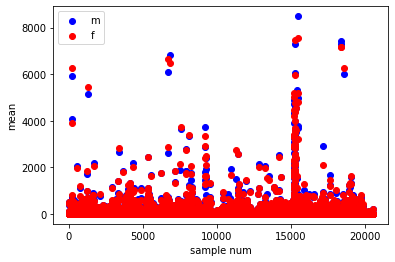

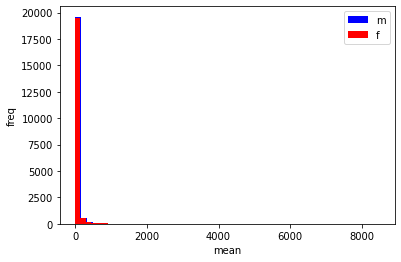

In [44]:
plt.scatter(np.arange(0,len(mean_m)), mean_m, color = 'blue', label='m')
plt.scatter(np.arange(0,len(mean_m)), mean_f, color = 'red', label = 'f')

plt.xlabel('sample num')
plt.ylabel('mean')
plt.legend()
plt.show()

plt.hist(mean_m, bins = 50, color = 'blue', label='m' )
plt.hist(mean_f, bins = 50, color = 'red', label='f' )

plt.xlabel('mean')
plt.ylabel('freq')
plt.legend()
plt.show()

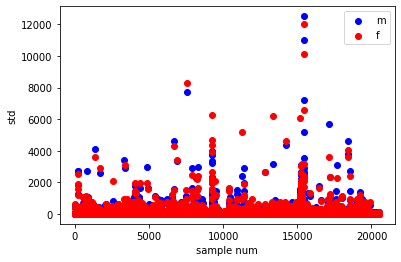

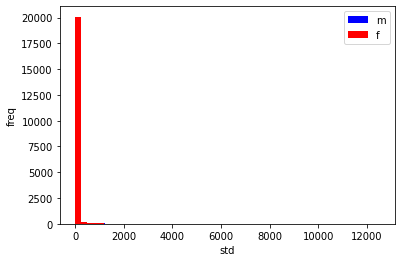

In [45]:
plt.scatter(np.arange(0,len(mean_m)), std_m, color = 'blue', label='m')
plt.scatter(np.arange(0,len(mean_m)), std_f, color = 'red', label = 'f')

plt.xlabel('sample num')
plt.ylabel('std')
plt.legend()
plt.show()

plt.hist(std_m, bins = 50, color = 'blue', label='m' )
plt.hist(std_f, bins = 50, color = 'red', label='f' )

plt.xlabel('std')
plt.ylabel('freq')
plt.legend()
plt.show()

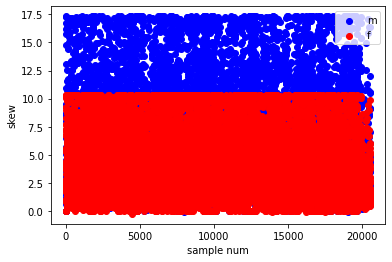

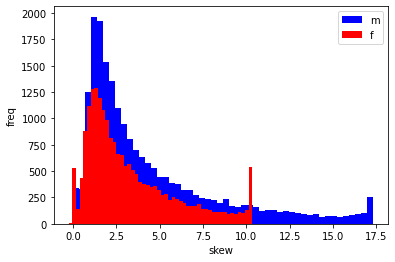

In [46]:
plt.scatter(np.arange(0,len(mean_m)), skew_m, color = 'blue', label='m')
plt.scatter(np.arange(0,len(mean_m)), skew_f, color = 'red', label = 'f')

plt.xlabel('sample num')
plt.ylabel('skew')
plt.legend()
plt.show()

plt.hist(skew_m, bins = 50, color = 'blue', label='m' )
plt.hist(skew_f, bins = 50, color = 'red', label='f' )

plt.xlabel('skew')
plt.ylabel('freq')
plt.legend()
plt.show()

do the following:

- hist for dignosed age
- bar plot for the stage
- Race
- over all survavil

In [47]:
list(df.columns[0:38])

['PATIENT_ID',
 'SUBTYPE',
 'CANCER_TYPE_ACRONYM',
 'OTHER_PATIENT_ID',
 'AGE',
 'SEX',
 'AJCC_PATHOLOGIC_TUMOR_STAGE',
 'AJCC_STAGING_EDITION',
 'DAYS_LAST_FOLLOWUP',
 'DAYS_TO_BIRTH',
 'DAYS_TO_INITIAL_PATHOLOGIC_DIAGNOSIS',
 'ETHNICITY',
 'FORM_COMPLETION_DATE',
 'HISTORY_NEOADJUVANT_TRTYN',
 'ICD_10',
 'ICD_O_3_HISTOLOGY',
 'ICD_O_3_SITE',
 'INFORMED_CONSENT_VERIFIED',
 'NEW_TUMOR_EVENT_AFTER_INITIAL_TREATMENT',
 'PATH_M_STAGE',
 'PATH_N_STAGE',
 'PATH_T_STAGE',
 'PERSON_NEOPLASM_CANCER_STATUS',
 'PRIMARY_LYMPH_NODE_PRESENTATION_ASSESSMENT',
 'PRIOR_DX',
 'RACE',
 'RADIATION_THERAPY',
 'WEIGHT',
 'IN_PANCANPATHWAYS_FREEZE',
 'OS_STATUS',
 'OS_MONTHS',
 'DSS_STATUS',
 'DSS_MONTHS',
 'DFS_STATUS',
 'DFS_MONTHS',
 'PFS_STATUS',
 'PFS_MONTHS',
 100130426]

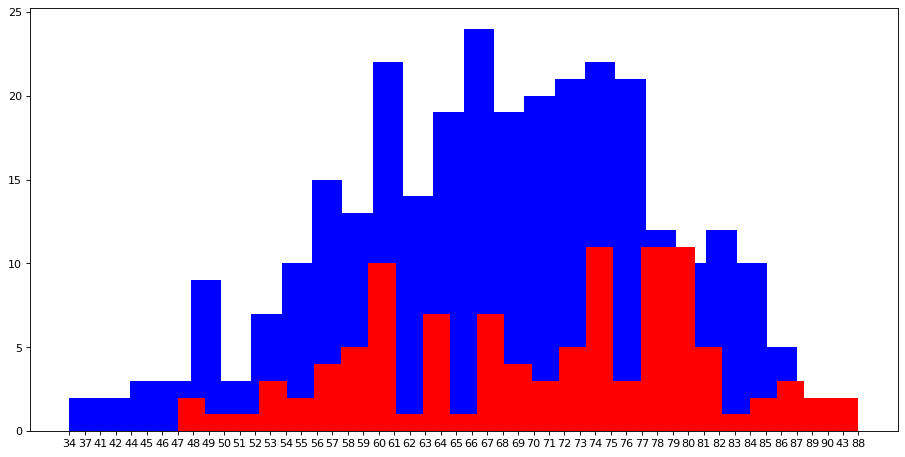

In [48]:
plt.figure(figsize=(14, 7), dpi=80)
plt.hist(np.sort(df_m.AGE), bins = 25, color = 'blue', label = 'm')
plt.hist(np.sort(df_f.AGE), bins = 25, color = 'red', label = 'f')

plt.show()

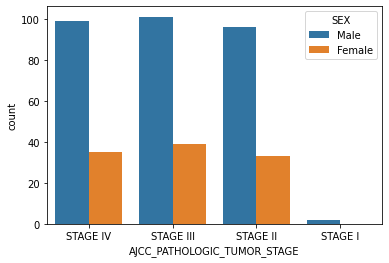

In [49]:
sns.countplot(x="AJCC_PATHOLOGIC_TUMOR_STAGE", hue="SEX", data=df)

plt.show()

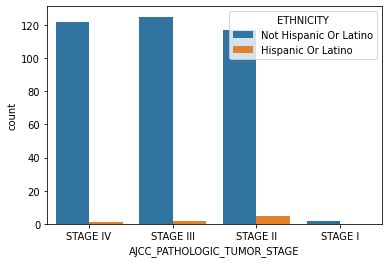

In [50]:
sns.countplot(x="AJCC_PATHOLOGIC_TUMOR_STAGE", hue="ETHNICITY", data=df)

plt.show()

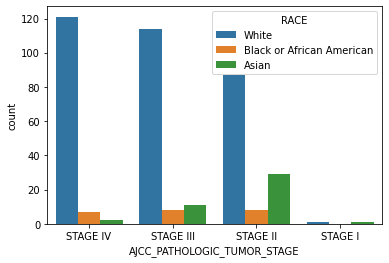

In [51]:
sns.countplot(x="AJCC_PATHOLOGIC_TUMOR_STAGE", hue="RACE", data=df)

plt.show()

weight vs dign

In [52]:
df_m_sor = df_m.sort_values('AGE')
df_f_sor = df_f.sort_values('AGE')


/tmp/ipykernel_520691/1047049949.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.scatter(df_m_sor.AGE, df_m_sor.WEIGHT.astype(np.float), label = 'm', color = 'blue')
/tmp/ipykernel_520691/1047049949.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.scatter(df_f_sor.AGE, df_f_sor.WEIGHT.astype(np.float), label = 'f', color='r

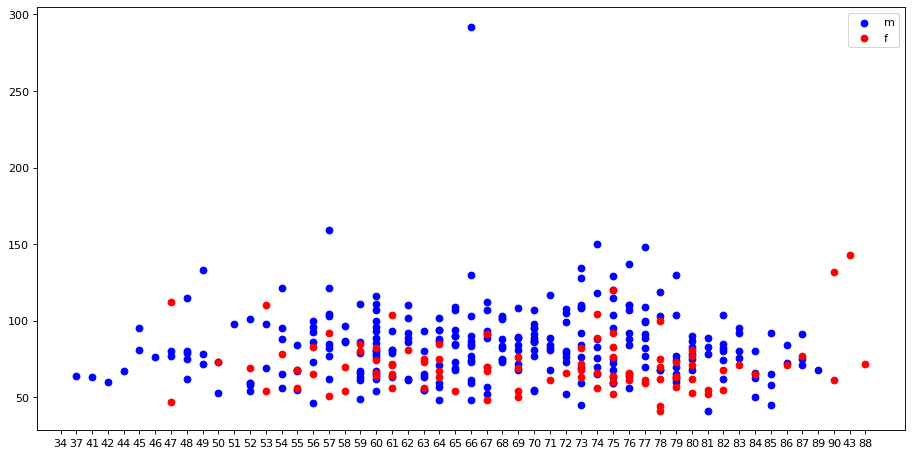

In [53]:
plt.figure(figsize=(14, 7), dpi=80)

plt.scatter(df_m_sor.AGE, df_m_sor.WEIGHT.astype(np.float), label = 'm', color = 'blue')
plt.scatter(df_f_sor.AGE, df_f_sor.WEIGHT.astype(np.float), label = 'f', color='red')
plt.legend()
plt.show()

/tmp/ipykernel_520691/4246797336.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.scatter(df_m_sor.AGE, df_m_sor.OS_MONTHS.astype(np.float), label = 'm', color = 'blue')
/tmp/ipykernel_520691/4246797336.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.scatter(df_f_sor.AGE, df_f_sor.OS_MONTHS.astype(np.float), label = 'f', co

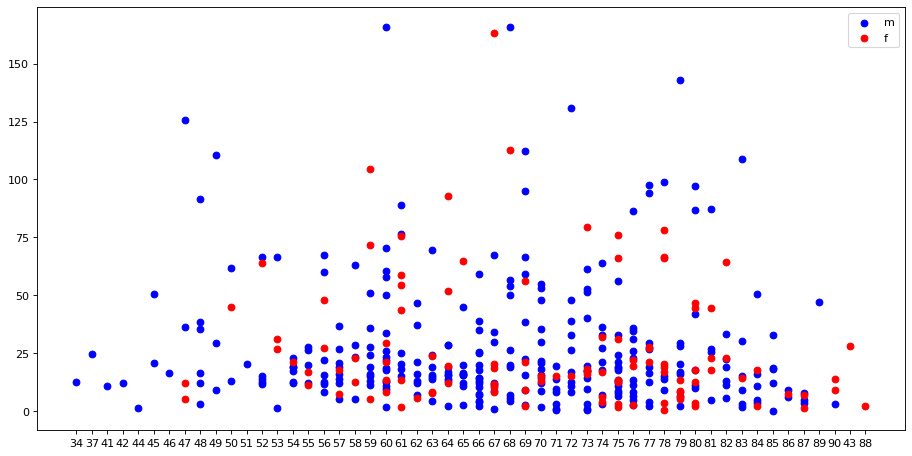

In [54]:
plt.figure(figsize=(14, 7), dpi=80)

plt.scatter(df_m_sor.AGE, df_m_sor.OS_MONTHS.astype(np.float), label = 'm', color = 'blue')
plt.scatter(df_f_sor.AGE, df_f_sor.OS_MONTHS.astype(np.float), label = 'f', color='red')
plt.legend()
plt.show()